<a href="https://colab.research.google.com/github/Angelaestefan/concentracion/blob/master/actividad_curvas_aprendizaje_validacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad evaluación de modelos

Evaluar un modelo de machine learning es un proceso fundamental. En particular, analizar el grado de sesgo y varianza resulta esencial para comprender su desempeño y capacidad de generalización.

En este cuaderno trabajaremos con el dataset Diabetes disponible en scikit-learn, sobre el cual ajustaremos diferentes modelos de regresión. Posteriormente, construiremos curvas de aprendizaje y de validación con el fin de obtener información sobre el nivel de sesgo y varianza presente en cada modelo.

Además, se te pedirá responder algunas preguntas y completar fragmentos de código, lo que permitirá reforzar los conceptos vistos y consolidar tu comprensión del proceso de evaluación de modelos.

### Dataset

En este dataset vamos a utilizar el dataset sintético Diabetes.

https://www.geeksforgeeks.org/machine-learning/sklearn-diabetes-dataset/

Diabetes dataset
- 442 muestras (filas)
- 10 caracteristicas (columnas)

Características:
- age – Edad del paciente.
- sex – Sexo del paciente.
- bmi – Índice de masa corporal (body mass index).
- bp – Presión arterial promedio.
- s1 – Medida de colesterol sérico.
- s2 – LDL (lipoproteínas de baja densidad).
- s3 – HDL (lipoproteínas de alta densidad).
- s4 – Relación de colesterol total con HDL.
- s5 – Nivel de triglicéridos en sangre.
- s6 – Nivel de glucosa en sangre.

Variable objetivo:

Una medida cuantitativa de la progresión de la diabetes un año después de la primera observación.

### SGDRegressor

Como un primer ejemplo, vamos a crear una curva de aprendizaje para un Regresor de la clase SGDRegressor.

Media por característica:
[-1.44429466e-18  2.54321451e-18 -2.25592546e-16 -4.85408596e-17
 -1.42859580e-17  3.89881064e-17 -6.02836031e-18 -1.78809958e-17
  9.24348582e-17  1.35176953e-17]

Desviación estándar por característica:
[0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]


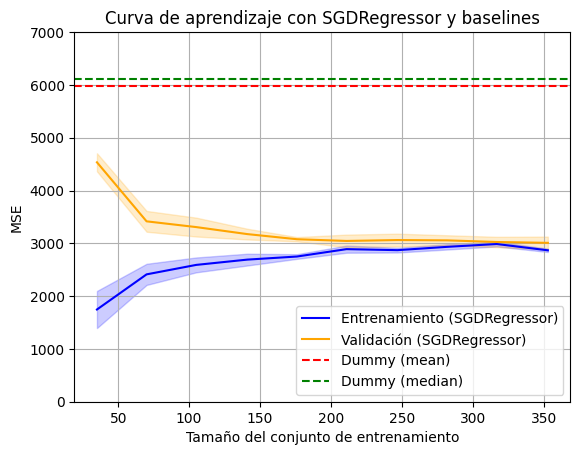

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Verificamos mean y std de cada característica
print("Media por característica:")
print(np.mean(X, axis=0))
print("\nDesviación estándar por característica:")
print(np.std(X, axis=0))


# Modelo real (pipeline con escalado + SGD)
model = make_pipeline(
    StandardScaler(),             # Para que la desviación estandar sea de 1
    SGDRegressor(
        loss="squared_error",     # equivalente a MSE
        learning_rate="constant",
        eta0=1e-3,                # tasa de aprendizaje inicial
        max_iter=2000,            # más iteraciones para asegurar convergencia
        tol=1e-3,
        random_state=42,
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (SGDRegressor)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SGDRegressor)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SGDRegressor y baselines")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()

1. ¿Por qué utilizamos validación cruzada para generar la curva de aprendizaje?
Porque al tener un dataset pequeño como el de diabetes, no conviene partir el dataset en entrenamiento, validacion y prueba. Por lo que la validacion cruzada para estos casos conviene porque nos permite asegurarnos de que todos los datos se usen tanto para entrenar como para validar


2. ¿El desempeño del modelo con estos parámetros se beneficiaría si aumentamos el número de ejemplos de entrenamiento?
No se va a beneficiar porque ambas curvas se han estabilizado y la brecha entre la curva de entrenamiento y validacion es pequeña, entonces el modelo no se beneficiaria tanto de nuevos datos


3. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
Al inicio tiene un error menor a la media y el bias s bajo. Al final el error de entrenamiento va creciendo y la curva de error de validacion va disminuyendo hasta que ambas curvas se acercan mucho.

4. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?
Al inicio el modelo tiene mucha varianza, es decir overfitting y al final la varianza disminuye tanto que ambas curvas se acercan.


### Regresión polinomial

Modifica el código anterior para incluir términos de segundo orden y las interacciones entre las variables (features). Puedes copiar el código de la celda anterior y modificar únicamente la parte necesaria. De esta forma podrás comparar ambas gráficas.

Para ello, puedes utilizar la función PolynomialFeatures disponible en sklearn.preprocessing.

/home/angiea/concentracion/.venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/angiea/concentracion/.venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/angiea/concentracion/.venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/angiea/concentracion/.venv/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

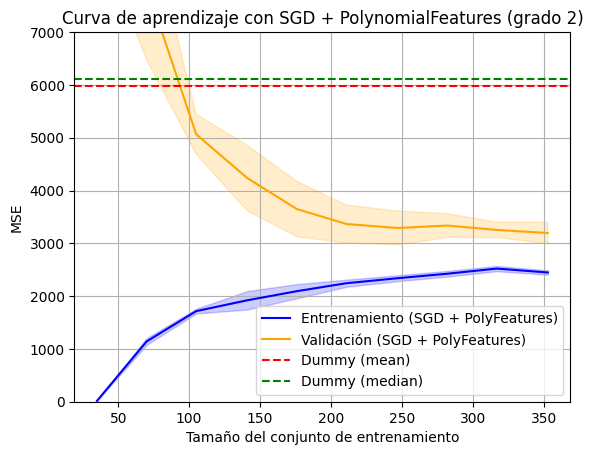

In [11]:
# Tu código aquí
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo con términos polinomiales de segundo orden + interacciones
model_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  # añade x^2 e interacciones
    StandardScaler(),
    SGDRegressor(
        loss="squared_error",
        learning_rate="constant",
        eta0=1e-3,
        max_iter=2000,
        tol=1e-3,
        random_state=42,
    )
)

# Curva de aprendizaje del modelo polinomial
train_sizes, train_scores, val_scores = learning_curve(
    model_poly, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========
plt.plot(train_sizes, train_mean, label="Entrenamiento (SGD + PolyFeatures)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SGD + PolyFeatures)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SGD + PolynomialFeatures (grado 2)")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()


Contesta las siguientes preguntas:

1. ¿Mejoró el desempeño del modelo?.
No tanto, porque al inicio con una muestra pequeña de datos la curva de validacion esta mas cerca de la media.
2. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
Al inicio presenta un sesgo bajo en la curva de entrenamiento pero un alto sesgo en la curva de validacion, es decir presenta overfitting. Mientras que al final el sesgo de la curva de entrenamiento aumenta y el sesgo de la curva de validacion disminuye.
3. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?
Al inicio tiene  una alta varianza o u overfitting, y al final podemos ver que la varianza disminuye aunque ambas curvas no se llegan a juntar tanto pero si a estabilizar

#### Regularización

Para demostrar cómo la regularización afecta el grado de sesgo y varianza, agrega regularización al SGDRegressor de la siguiente celda. Te recomiendo comenzar probando con regularización tipo Ridge. Consulta la documentación de la clase SGDRegressor para obtener información sobre los argumentos penalty y alpha, que te permitirán definir el tipo de regularización y la intensidad de la misma.

Prueba con distintos valores de alpha. Por ejemplo, utiliza regularización L2 (penalty="l2") y experimenta con valores de alpha como 0.1, 1, 10 y 100.

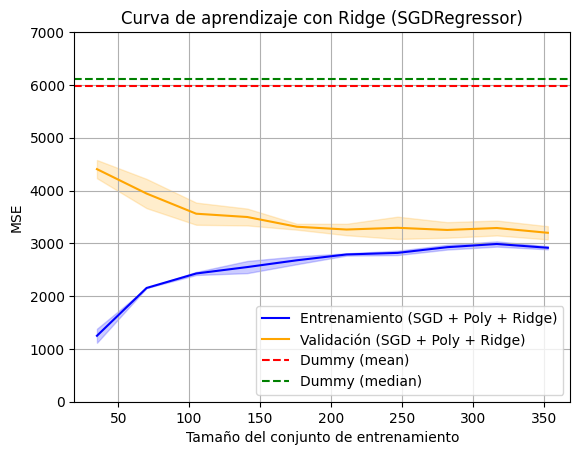

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# ===== Modelo con polinomios + Ridge regularization =====
model_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=True),
    StandardScaler(),
    SGDRegressor(
        loss="squared_error",
        learning_rate="constant",
        eta0=1e-3,
        max_iter=2000,
        tol=1e-3,
        random_state=42,
        # Agrega aqui regularización Ridge
        penalty='l2',
        alpha=0.95
    )
)

# Curva de aprendizaje con polinomios
train_sizes, train_scores, val_scores = learning_curve(
    model_poly, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========
plt.plot(train_sizes, train_mean, label="Entrenamiento (SGD + Poly + Ridge)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SGD + Poly + Ridge)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con Ridge (SGDRegressor)")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()

Edita esta celda para contestar las siguientes preguntas:

1. ¿Qué grado de sesgo (bias) y varianza observas con valores pequeños de alpha (por ejemplo, 0.1)? 
la regularización es débil, por lo que el modelo tiene baja restricción y puede ajustarse mucho a los datos de entrenamiento. Lo que suele resultar en bajo sesgo pero alta varianza, es decir, el modelo puede sobreajustar y ser sensible a pequeñas variaciones en los datos.
2. ¿Qué grado de sesgo (bias) y varianza observas con valores grandes de alpha (por ejemplo, 100)? una fuerte regularizacion que restringue los coeficientes del modelo. Es un modelo mas simple con alto bias y baja varianza. El modelo tiende a subajustar.
Con valores grandes se aplica una fuerte penalización lo que forza a valores pequeños por lo que el sesgo suele ser mas alto y una baja varianza.
3. ¿Cómo explicarías esta diferencia con tus propias palabras? la diferencia se debe a que la regularizacion controla
El tener alpha pequeño le permite al modelo porer ajustarse a detalles de los datos de entrenamiento pero con una mala generalización, pero el tener alta varianza hace que el modelo se vuelva mas restrictivo y le dificulta el ajuste de datos.

### Regresión con K-Vecinos más cercanos

1. Reemplaza la clase SGDRegressor por KNeighborsRegressor. Comienza con los siguientes parámetros:

- n_neighbors=5,     
- weights="uniform",
- metric="minkowski",
- p=2

2. Consulta en la documentación la función de los parámetros weights y metric
3. Genera la curva de validación correspondiente

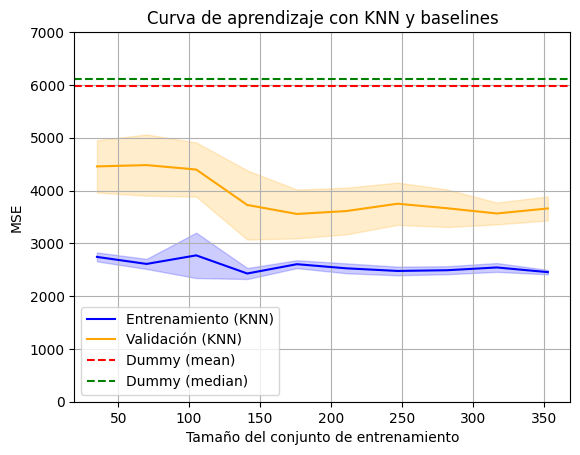

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo real (pipeline con escalado + KNN)
model = make_pipeline(
    StandardScaler(),
    # Define aqui tu instanciación de la clase KNeighborsRegressor
    KNeighborsRegressor(
        n_neighbors=5,
        weights="uniform",
        metric="minkowski",
        p=2
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (KNN)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (KNN)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con KNN y baselines")
plt.ylim(0, 7000)  # Ajustar el límite del eje y para mejor visualización
plt.grid()
plt.legend()
plt.show()

Edita esta celda y responde las siguientes preguntas:

1. ¿Mejoró el desempeño del modelo en comparación con el modelo anterior (SGDRegressor)?
Si el desempeño mejoro significativamente en comparación con el SGDRegressor basico, ya que el nuevo modelo logra un MSE mas bajo y las curvas de aprendizaje se estabilizan muy por debajo de las lineas dummy base.
2. ¿Qué grado de sesgo presenta el modelo al inicio y al final del entrenamiento?
Al inicio el modelo tiene un sesgo bajo y al final el sesgo baja ligeramente.
3. ¿Qué grado de varianza presenta el modelo al inicio y al final del entrenamiento?
Al inicio el modelo tiene una alta varianza y al final la varianza disminuye y ambas curvas se estabilizan
4. ¿Qué hiperparámetro consideras que deberíamos ajustar para intentar mejorar el modelo?
Creo que podriamos ajusta el n_neighbors para poder encontrar un equilibrio entre el sesgo y la varianza buscando el valor que minimice el error de validacion sin sobreajustar o subajustar el modelo

La siguiente celda crea una curva de validación en el que el eje horizontal muestra distintos valores del parametro k y el eje vertical el desempeño.

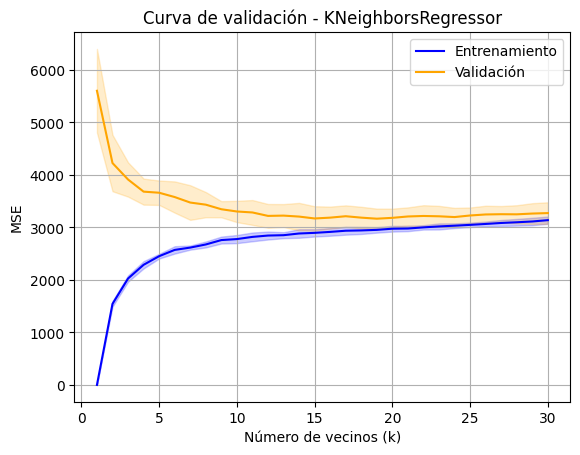

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo KNN dentro de un pipeline con escalado
model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

# Rango de vecinos a probar
param_range = np.arange(1, 31)

# Curva de validación
metric = 'neg_mean_squared_error'  # métrica de evaluación
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name="kneighborsregressor__n_neighbors",  # nombre completo en pipeline
    param_range=param_range,
    cv=5,
    scoring=metric,
    n_jobs=-1
)

# Convertir de MSE negativo a MSE positivo
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# Gráfica
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(param_range, val_mean, label="Validación", color="orange")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.xlabel("Número de vecinos (k)")
plt.ylabel("MSE")
plt.title("Curva de validación - KNeighborsRegressor")
plt.legend()
plt.grid()
plt.show()

Contesta las siguientes preguntas:

1. ¿Qué grado de sesgo y varianza se observa para valores pequeños de k?
En valores pequeños el sesgo es bajo y la varianza es alto, esta brecha tan grande indica un sobreajuste
2. ¿Qué grado de sesgo y varianza se observa para valores grandes de k?
Para los valores altos de k observo un alto sesgo y una baja varianza lo que hace que el modelo se vuelva mas estable y que tenga una buena generalizacion
3. ¿Qué valor de k consideras más conveniente y por qué?
Considero que un valor entre 10 y 18 porque es cuando la curva se empieza a estabilizar y permite tener un mejor equilibrio entre el sesgo y la varianza

#### Hyperparameter tuning

1. Implementa una búsqueda en rejilla con la función GridSearchCV de scikit-learn para encontrar el valor óptimo del parámetro k.
2. Divide el conjunto de datos en entrenamiento y prueba.
3. Realiza la búsqueda de hiperparámetros usando únicamente el conjunto de entrenamiento.
4. Entrena el modelo con el valor óptimo de k que obtuviste en la búsqueda.
5. Evalúa el modelo en el conjunto de prueba y reporta el error de generalización.

In [15]:
# Tu código aqui
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 1. Cargar y dividir los datos
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Definir el pipeline y el rango de hiperparámetros
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {
    'kneighborsregressor__n_neighbors': np.arange(1, 31)
}

# 3. Realizar la búsqueda en rejilla en el conjunto de entrenamiento
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 4. Obtener el valor óptimo de k
best_k = grid_search.best_params_['kneighborsregressor__n_neighbors']
print(f"El valor óptimo de k encontrado es: {best_k}")

# 5. Entrenar y evaluar el modelo final con el mejor k
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print(f"El error de generalización (MSE) en el conjunto de prueba es: {mse_test:.2f}")

El valor óptimo de k encontrado es: 18
El error de generalización (MSE) en el conjunto de prueba es: 3057.96


Edita las siguientes celdas para contestar las siguientes preguntas:

1. ¿Cuál es el valor óptimo de k según la busqueda de rejilla?
El valor optimo de k segun la busqueda de rejilla es 18.
2. ¿Por qué es importante usar validación cruzada para encontrar el valor óptimo de k?
Porque al usar validacion cruzaja evitamo el sobreajuste al conjutno de validacion y nos da mayor fiabilidad y un mejor desempeño en general

# Ejemplos extras - utilizando otros tipos de regresores

#### Regressor SVR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo real (pipeline con escalado + SVR)
model = make_pipeline(
    StandardScaler(),
    SVR(
        kernel="rbf",   # kernel RBF (gaussiano), puedes probar "linear" o "poly"
        C=1.0,          # parámetro de regularización
        epsilon=0.1     # margen de tolerancia en la regresión
    )
)

# Curva de aprendizaje del modelo
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========

# DummyRegressor con media
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

# DummyRegressor con mediana
dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========

plt.plot(train_sizes, train_mean, label="Entrenamiento (SVR)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (SVR)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

# Líneas horizontales de los baselines
plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con SVR y baselines")
plt.legend()
plt.show()

Curva de validación para el parámetro C del SVR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR

# Datos
X, y = load_diabetes(return_X_y=True)

# Modelo: SVR (kernel lineal por simplicidad)
model = SVR(kernel="linear")

# Rango de valores de C a probar
param_range = np.logspace(-3, 5, 10)  # desde 0.001 hasta 1000

# Curva de validación con MSE
train_scores, val_scores = validation_curve(
    model, X, y,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="neg_mean_squared_error",  # usamos MSE
    n_jobs=-1
)

# Convertimos los valores (hacerlos positivos)
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Gráfica ========
plt.semilogx(param_range, train_mean, label="Entrenamiento (MSE)", color="blue")
plt.fill_between(param_range, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.semilogx(param_range, val_mean, label="Validación (MSE)", color="orange")
plt.fill_between(param_range, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.xlabel("C")
plt.ylabel("MSE")
plt.title("Curva de validación para SVR (kernel lineal)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### Regresor HistGradientBoostingRegressor

Ejemplo learning curve para un regresor del tipo HistGradientBoostingRegressor

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.dummy import DummyRegressor

# Datos
X, y = load_diabetes(return_X_y=True)

# ===== Modelo con HistGradientBoosting =====
model_hgb = HistGradientBoostingRegressor(
    max_depth=5,        # profundidad máxima de los árboles   probar 5, 2
    learning_rate=0.1,  # tasa de aprendizaje
    max_iter=200,       # número de iteraciones (árboles)  probar 200, 100
    random_state=0,
    min_samples_leaf=30
)

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model_hgb, X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Medias y desviaciones
train_mean = -np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = -np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# ======== Baselines ========
dummy_mean = DummyRegressor(strategy="mean")
dummy_mean_scores = cross_val_score(dummy_mean, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_mean = -np.mean(dummy_mean_scores)

dummy_median = DummyRegressor(strategy="median")
dummy_median_scores = cross_val_score(dummy_median, X, y, cv=5, scoring="neg_mean_squared_error")
baseline_median = -np.mean(dummy_median_scores)

# ======== Gráfica ========
plt.plot(train_sizes, train_mean, label="Entrenamiento (HistGBR)", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validación (HistGBR)", color="orange")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="orange")

plt.axhline(y=baseline_mean, color="red", linestyle="--", label="Dummy (mean)")
plt.axhline(y=baseline_median, color="green", linestyle="--", label="Dummy (median)")

plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje con HistGradientBoostingRegressor")
plt.ylim(0, 7000)
plt.legend()
plt.grid()
plt.show()